(ricker-wavelet-page)=
# Ricker wavelet and its spectrum


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
%matplotlib inline

plt.show()

In [3]:
plt.rcParams.update({'lines.linewidth': 3.0, 'figure.figsize': [8.0, 5.0],
                     'axes.grid' : True, 'grid.linestyle': ":", 'grid.alpha': 0.7, 'lines.markersize': 5})

COLOR_ax = [0.15,0.15,0.15]
mpl.rcParams['text.color'] = COLOR_ax
mpl.rcParams['axes.labelcolor'] = COLOR_ax
mpl.rcParams['xtick.color'] = COLOR_ax
mpl.rcParams['ytick.color'] = COLOR_ax

colorlist_Iceland = np.array([[5, 100, 113], [253, 170, 0], [80, 63, 88], [134, 172, 25], [76, 166, 193], [157, 110, 51], [43, 63, 85]])/255.0
colorlist_Iceland = np.array([[50, 70, 110], [150, 192, 25], [157, 110, 51], [5, 100, 113], [80, 63, 88], [76, 166, 193], [253, 170, 0]])/255.0
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = colorlist_Iceland) 

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Introduction 🎍

A Ricker wavelet is a signal commonly used in seismic interpretation, modelling and inversion. It has a relatively simple visual form with a positive peak and two negative side-lobes.

Sometimes it is referred to as *Mexican hat wavelet*.


:::{figure-md} sombrero
<img src="./Images/sombrero.png" alt="Sombrero from Collins Dictionary" class="bg-primary mb-1" width="400px">

Ricker wavelet / Mexican hat / sombrero
:::

Analytically, it has a following representation in time domain:

$$A(t) = (1-2 \pi^2 f^2 t^2) e^{-\pi^2 f^2 t^2}$$


:::{seealso}

- [Ricker wavelet in SEG dictionary](https://wiki.seg.org/wiki/Dictionary:Ricker_wavelet)
- [Ricker wavelet in *scipy*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ricker.html)
- [Ricker wavelet in *SubSurfWiki*](https://subsurfwiki.org/wiki/Ricker_wavelet)

:::

## Objectives 🎯
1. Generate a Ricker wavelet given its dominant frequency
2. Plot its time response and frequency spectrum
3. Apply phase rotation to the wavelet


## Generate a Ricker wavelet 🆕 

First, we need to set the peak dominant frequency of the wavelet ($f$ term in the formula), let's say 30 Hz. Since typical frequencies of seismic signals fall between 10 and 100 Hz, that would be appropriate.

In [4]:
freq = 30

Second, let's define a *time* vector (array). As the wavelet reaches highest amplitude when time is zero, it is convenient to have a zero-centered time vector.

Normally, in seismic exploration we work with time sampling rate of 0.5, 1, or 2 milliseconds. 

Here, let the time-vector span from -0.05 to 0.05 seconds with a step of 1 ms.

In [5]:
import numpy as np

dt = 0.001
tmin = -0.05
tmax = 0.05
t = np.arange(tmin, tmax, dt)
NSamples = len(t)

Time and frequency having been set up, we can proceed to computation of amplitudes.

In [6]:
from numpy import pi, exp

w = (1 - 2*(pi*freq*t)**2) * exp(-(pi*freq*t)**2)

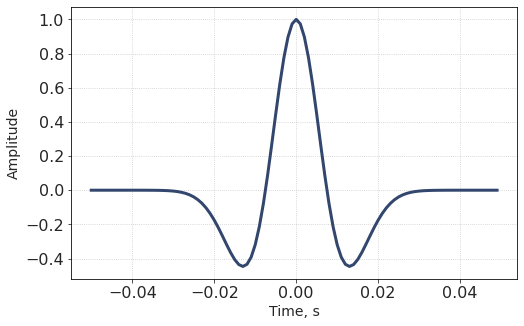

In [7]:
import matplotlib.pyplot as plt

plt.plot(t, w)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.show()

## Compute its spectrum 🌈

If the spectrum of the wavelet is $Z$ (array of complex numbers), then its amplitude spectrum is $|Z|$ and phase spectrum is $arg(Z)$:

$$
 Z = |Z| \cdot e^{j \cdot arg(Z)}
$$

Fourier spectrum can be computed by Discrete Fourier Transform (`fft` function in `scipy.fftpack` module). We can also easily determine its amplitude and phase by applying `abs` and `angle` functions of `numpy`.

In [8]:
from scipy.fftpack import fft, ifft, fftfreq

In [9]:
S = fft(w)
AS = np.abs(S)
PS = np.angle(S)

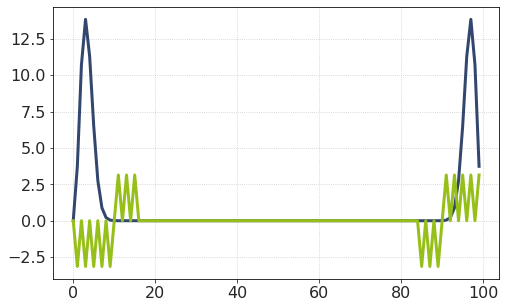

In [10]:
plt.plot(AS, label = 'Phase spectrum')
plt.plot(PS, label = 'Amplitude spectrum')

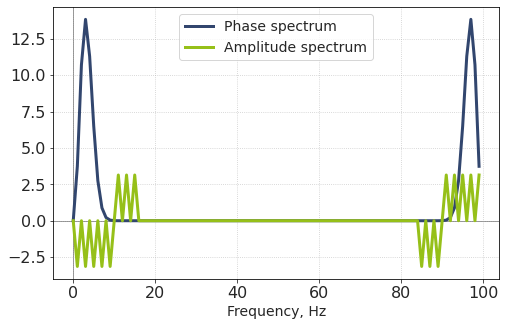

In [11]:
plt.plot(AS, label = 'Phase spectrum')
plt.plot(PS, label = 'Amplitude spectrum')
plt.gca().axhline(0, lw=0.5, c = COLOR_ax, zorder = 0)
plt.gca().axvline(0, lw=0.5, c = COLOR_ax, zorder = 0)
plt.xlabel('Frequency, Hz')
plt.legend(loc = 'upper center')
plt.show()

What do we see here?

First, the amplitude and phase spectra are symmetric with respect to the center. We covered this in another page.

Second, the amplitude spectrum has a clear maximum at a certain point. We can expect this point to correspond to the dominant frequency of the wavelet. This can be verified by computing FFT frequencies (via `fftfreq`, for example) and making another plot. We omit the "mirrored" part of the spectra here, zooming-in on range from 0 to 250 Hz.

In [12]:
f = fftfreq(NSamples, dt)

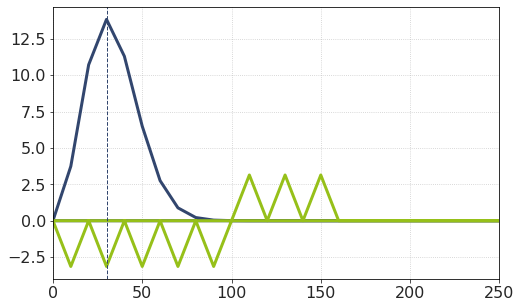

In [13]:
plt.plot(f, AS, label = 'Amplitude spectrum')
plt.plot(f, PS, label = 'Phase spectrum')
plt.xlim(0, 250)
plt.axvline(freq, lw = 1, ls = '--', label = 'Dominant frequency')

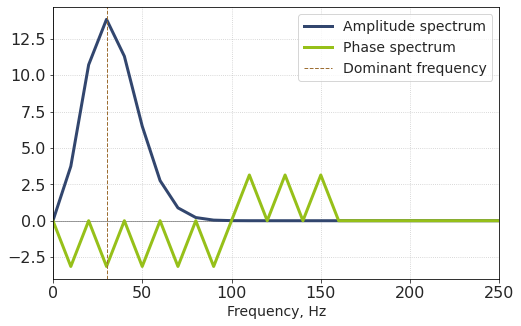

In [14]:
plt.plot(f[:NSamples//2], AS[:NSamples//2], label = 'Amplitude spectrum')
plt.plot(f[:NSamples//2], PS[:NSamples//2], label = 'Phase spectrum')
plt.gca().axvline(freq, c = colorlist_Iceland[2], lw = 1, ls = '--', label = 'Dominant frequency')
plt.gca().axhline(0, lw=0.5, c = COLOR_ax, zorder = 0)
plt.gca().axvline(0, lw=0.5, c = COLOR_ax, zorder = 0)
plt.gca().set_xlim(0, 250)
plt.xlabel('Frequency, Hz')
plt.legend()
plt.show()

Third, the phase spectrum is non-zero, which is somewhat surprising! We did not expect this to happen since the amplitude at zero-time is maximum and the wavelet is perfectly symmetric. 

Then why does the phase differ from zero? How does the *true* zero-phase wavelet look like?

(ricker-wavelet-zero-phase)=
## Zero-Phase Ricker wavelet ⚖️

The apparent contradiction mentioned above comes from the fact that the time-vector did not count in FFT.

Indeed, to compute the spectrum we simply passed variable `w` to the `fft` function, ignoring time-vector `t`.

Thus, the above spectra were the spectra of the following signal (pay attention to the x-axis):

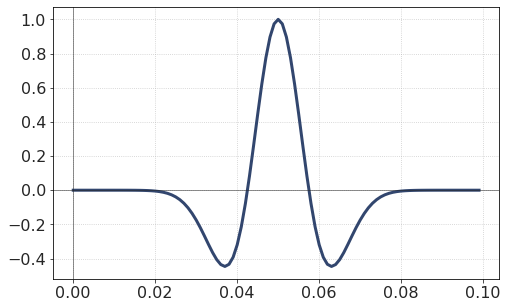

In [15]:
plt.plot(t-np.min(t), w)
plt.gca().axhline(0, lw=0.5, c = COLOR_ax)
plt.gca().axvline(0, lw=0.5, c = COLOR_ax)
plt.show()

This wavelet is actually **not** zero-phase! It has a maximum at the middle-sample (at time 0.05 s) rather than at 0.

So let's try and create the new Ricker wavelet, with phase equal to 0. 

In order to achieve this, we have to:
1. Leave its amplitude unchanged;
2. Replace phase spectrum by zeros;
3. Take the inverse Fourier transform of the new spectrum;



For that, we will multiply the phase spectrum `PS` of wavelet `w` by zero. 

In [16]:
AS0 = AS
PS0 = np.zeros_like(PS)

(0.0, 250.0)

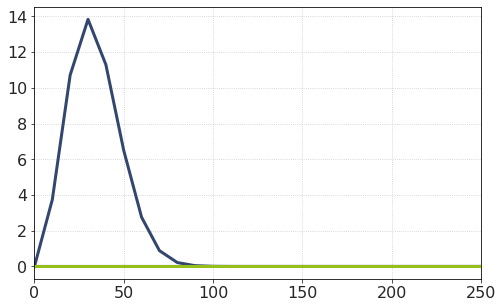

In [17]:
plt.plot(f, AS0, label = 'Amplitude spectrum')
plt.plot(f, PS0, label = 'Phase spectrum')
plt.xlim(0, 250)

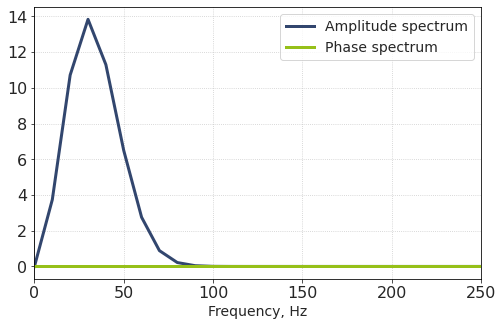

In [18]:
plt.plot(f[:NSamples//2], AS0[:NSamples//2], label = 'Amplitude spectrum')
plt.plot(f[:NSamples//2], PS0[:NSamples//2], label = 'Phase spectrum')

plt.gca().axhline(0, lw=0.5, c = COLOR_ax, zorder = 0)
plt.gca().axvline(0, lw=0.5, c = COLOR_ax, zorder = 0)
plt.gca().set_xlim(0, 250)
plt.xlabel('Frequency, Hz')
plt.legend()
plt.show()

In [19]:
w0 = np.real_if_close(ifft(AS0 * exp(1j*PS0)))

`w0` is the new wavelet obtained by zeroing the phase of original Ricker wavelet.

Therefore, denoting zero-phase spectrum by Z<sub>0</sub>:




$$
\begin{eqnarray*}
& arg(Z_0) = 0, \\
& Z_0 = |Z_0| \cdot e^{j \cdot arg(Z_0)} = |Z_0|
\end{eqnarray*}
$$

We expect Z<sub>0</sub> to be **real**.

```{admonition} What is np.real_if_close and why we need it here
:class: dropdown
Generally, the wavelet resulting from inverse FFT is complex. In our particular case, we expect the wavelet to be real (because its spectrum is symmetric).
However, the imaginary part of new wavelet is not perfectly zero due to computational issues. But it is so small (order of 1*10<sup>-17</sup>) that can be neglected with no negative effect. For such sutuations, `numpy` has an implemented function [numpy.real_if_close](https://numpy.org/doc/stable/reference/generated/numpy.real_if_close.html). It converts complex-but-almost-real numbers to real.
```

Text(0, 0.5, 'Amplitude')

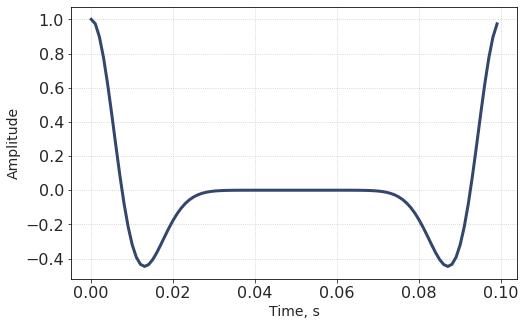

In [20]:
plt.plot(t-np.min(t), w0)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')

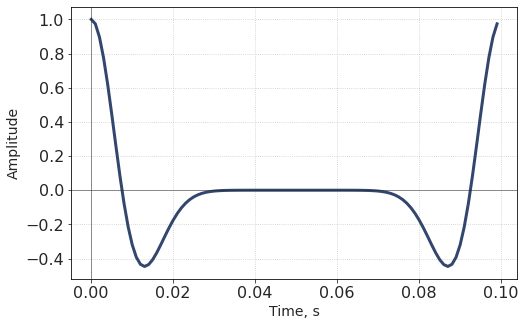

In [21]:
plt.plot(t-np.min(t), w0)
plt.gca().axhline(0, lw=0.5, c = COLOR_ax)
plt.gca().axvline(0, lw=0.5, c = COLOR_ax)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.show()

In fact, this operation circularly shifted (or rolled) the wavelet by `NSamples//2` samples. This signal appears to be ugly at first glance, but!

Recalling the periodicity implied in Discrete Fourier Transform, the new wavelet *actually* looks like this:

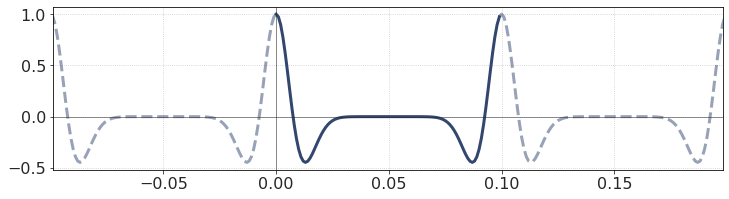

In [22]:
fgr, ax = plt.subplots(figsize = [12,3])
plt.plot(t-np.min(t), w0)
plt.plot(np.append(np.max(t) - np.min(t), t-3*np.min(t)), np.append(w0[-1], w0), c = colorlist_Iceland[0], alpha = 0.5, ls = '--')
plt.plot(np.append(t + np.min(t), 0), np.append(w0, w0[0]), c = colorlist_Iceland[0], alpha = 0.5, ls = '--')
plt.gca().axhline(0, lw=0.5, c = COLOR_ax)
plt.gca().axvline(0, lw=0.5, c = COLOR_ax)
plt.gca().set_xlim(np.min(t) - np.max(t),   2*(np.max(t) - np.min(t)))
plt.show()

And despite its strange appearance, it is exactly what we need! It is a wavelet with a maximum at 0 sample, symmetric with respect to y-axis. And it is the periodicity of Fourier transforms that allows us to construct the zero-phase wavelet.

This effect resembles the periodicity of discrete Fourier spectrum. As with spectra, the 'mirrored' right part of the wavelet can be virtually shifted to the negative part of time axis.

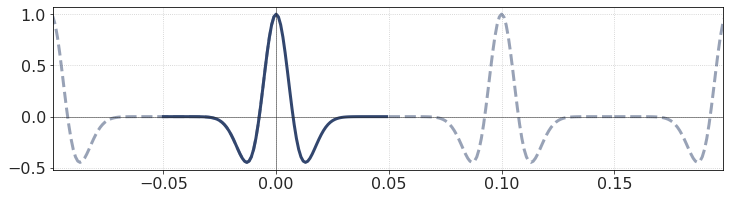

In [23]:
fgr, ax = plt.subplots(figsize = [12,3])
plt.plot(t, w)
plt.plot(t-2*np.min(t), w, c = colorlist_Iceland[0], alpha = 0.5, ls = '--')
plt.plot(t-4*np.min(t), w, c = colorlist_Iceland[0], alpha = 0.5, ls = '--')
plt.plot(np.append(t + np.min(t), 0), np.append(w0, w0[0]), c = colorlist_Iceland[0], alpha = 0.5, ls = '--')
plt.gca().axhline(0, lw=0.5, c = COLOR_ax)
plt.gca().axvline(0, lw=0.5, c = COLOR_ax)
plt.gca().set_xlim(np.min(t) - np.max(t),   2*(np.max(t) - np.min(t)))
plt.show()

In fact, this is only a matter of visualization. Of course, for most purposes (convolution, for instance) it is preferable to use a normal-looking signal. By the way, the 'True zero-phase' and 'Centered maximum' wavelets can be related using the *shift theorem*, a property of Fourier transform.

However, in terms of discrete Fourier transform, always remember how the zero-phase wavelet looks like:

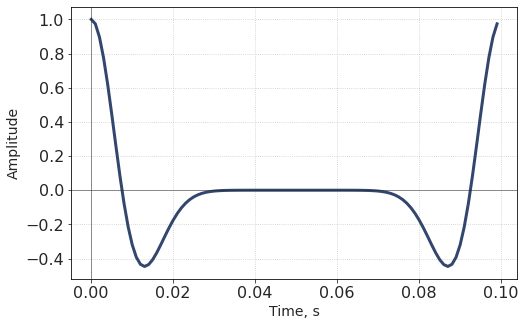

In [24]:
plt.plot(t-np.min(t), w0)
plt.gca().axhline(0, lw=0.5, c = COLOR_ax)
plt.gca().axvline(0, lw=0.5, c = COLOR_ax)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.show()

## Constant-phase Ricker wavelet ➖

As an experiment, why not introduce a constant phase shift to the wavelet? Let's say, 60 degrees (which is $\pi/3$). 

Here, we should not forget about the symmetry of the phase spectrum which must be an odd function for real signals. Hence we have to add 60° to 'positive' frequencies and subtract 60° from so-called 'negative' frequencies. We start with a 'normal' good-looking wavelet (with maximum in the middle).

In [25]:
AS60 = AS
PS60 = np.zeros_like(PS)
PS60[1:NSamples//2] = PS[1:NSamples//2] + pi/3
PS60[NSamples//2+1:] = PS[NSamples//2+1:] - pi/3
w60 = np.real_if_close(ifft(AS0 * exp(1j*PS60)))

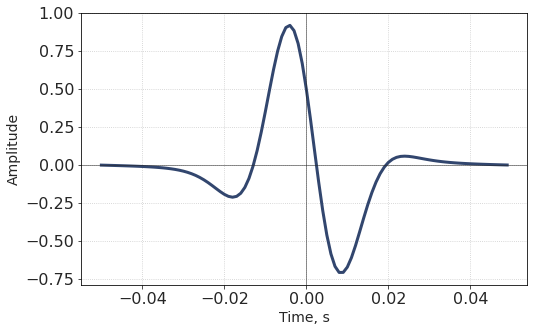

In [26]:
plt.plot(t, w60)
plt.gca().axhline(0, lw=0.5, c = COLOR_ax)
plt.gca().axvline(0, lw=0.5, c = COLOR_ax)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.show()

A little bit of playing with phase yields the following picture:

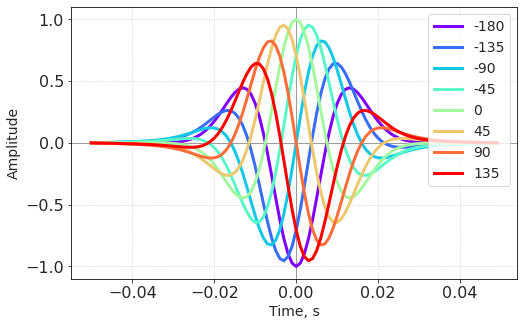

In [27]:
PS_sh = np.zeros_like(PS)
AS_sh = np.zeros_like(AS)
phase_step = 45
colors = plt.cm.rainbow(np.linspace(0, 1, 360//phase_step))


for i, phshift in enumerate(range(-180, 180, phase_step)):
    AS_sh = AS0
    PS_sh[1:NSamples//2] = PS[1:NSamples//2] + pi*phshift/180
    PS_sh[NSamples//2+1:] = PS[NSamples//2+1:] - pi*phshift/180
    w_sh = np.real_if_close(ifft(AS_sh * exp(1j*PS_sh)))
    plt.plot(t, w_sh, c = colors[i], label = '{0:.0f}'.format(phshift))
    
plt.axhline(0, lw=0.5, c = '#333333', zorder = 0)
plt.axvline(0, lw=0.5, c = '#333333', zorder = 0)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend(loc = 'upper right')

plt.show()

The imaginary enveloping line that is tangent to each wavelet of this set is called *Instantaneous Amplitude* or *Amplitude Envelope*.

## Related topics 🔗

- Discrete Fourier Transform
- Synthetic trace
- [Seismic attributes: complex trace](complex-trace-page)

___
<sub>Created on Dec 6, 2021</sub>